In [6]:
# !pip install scikit-learn
# !pip show scikit-learn
# !pip install openpyxl


     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     -------------------------- ----------- 174.1/250.0 kB 3.5 MB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.2 MB/s eta 0:00:00


In [4]:
import sklearn
sklearn.__v

'1.2.2'

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='test')


In [8]:
train_df

,Father,Son
0,165.100,151.892
1,165.100,160.782
2,167.132,159.512
3,155.194,163.322
4,160.020,163.068
...,...,...
750,186.182,172.466
751,167.132,154.940
752,181.102,173.482
753,179.578,176.022


In [9]:
##########데이터 전처리

x_train = train_df.drop(['Son'], axis=1)
x_test = test_df.drop(['Son'], axis=1)
y_train = train_df['Son']
y_test = test_df['Son']

In [10]:
x_train = x_train.to_numpy() # x_train.values
x_test = x_test.to_numpy()


In [12]:
# 아버지의 키를 입력하면 아들의 키를 예측(아들의 키는 무한대의 숫자중 1개)
# 가장 단순한 선형회귀

from sklearn.linear_model import LinearRegression   # wx+b 공식을 제공하는 에스티메이터

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_, model.intercept_ # w. b


In [ ]:
# 트레이닝(훈련) 자료값의 오차가 작아야, 이 w,b를 사용할수 있음
# 훈련자료의 오차를 확인함.
# y_train 값 - (x_train*model.coef_+model.intercept_)
# 2번 : 각각항목을 

In [14]:
# 회귀공식에서만 사용되는 R2제곱이라는 공식이 있음. 1에 가까울수록 좋음
print(model.score(x_test, y_test))

0.25199779058466176


In [15]:
# 위의 자료가 잘 되었다면, w,b값이 잘 fit 되어서 스코어 값이 좋다면
# 테스트자료에 사용
# 위의 스코어값에서 확인하든 다른 방법으로 확인하든 결과값이 좋으면
# 기존의 y값과 비교가 가능함으로
# y값이 존재하지 않는 자료에 넣음
model.predict(x_test)

array([168.62656977, 171.39068065, 171.12743199, 173.23342123,
       176.78727806, 170.46931036, 171.6539293 , 174.68128883,
       176.65565374, 167.44195083, 170.2060617 , 169.41631574,
       171.39068065, 175.73428345, 171.91717796, 171.91717796,
       172.97017257, 175.07616181, 174.5496645 , 173.36504556,
       173.62829421, 174.41804017, 175.20778614, 175.73428345,
       176.26078076, 176.91890239, 177.97189701, 179.02489163,
       181.7890025 , 170.33768603, 172.70692392, 171.78555363,
       172.31205094, 172.97017257, 175.47103479, 176.39240508,
       175.60265912, 177.97189701, 184.02661606, 172.04880228,
       174.94453748, 177.70864836, 177.31377537, 177.97189701,
       180.20951057, 184.55311337, 171.6539293 , 176.12915643,
       177.05052672, 179.02489163, 181.39412952, 174.02316719,
       173.89154287, 175.73428345, 175.86590777, 177.31377537,
       179.94626192, 174.68128883, 181.92062683, 177.31377537,
       176.78727806, 174.81291316, 166.65220487, 170.73

## 로지스틱 회귀 모델

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##########데이터 로드

x_data = np.array([
    [2, 1], #  [x1, x2] 
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

labels = ['fail', 'pass']

In [22]:
model = LinearRegression()
model.fit(x_data, y_data)
print(model.coef_,model.intercept_) # x1과 x2중에 x1이 더 높기 때문에 영향력이 많다. (중요한 변수이다.)
# [2,1] 이 값의 예측값은?
# 2*model.coef_[0]+1*model.coef_[1]+model.intercept_, model.predict(x_data)[0]

x_data[:,0]

[0.14726495 0.03377002] -0.3717131697471452


array([2, 3, 3, 5, 7, 2, 8, 9, 6, 9, 6, 2])

In [27]:
X0결과 = x_data[:,0]*model.coef_[0]
X1결과 = x_data[:,1]*model.coef_[1]

y예측값 = X0결과+X1결과+model.intercept_
y예측값

array([-0.04341326,  0.13762171,  0.20516175,  0.53346166,  0.82799155,
        0.09166682,  1.11033658,  1.29137154,  0.91711675,  1.02121139,
        0.84957671,  0.0578968 ])

In [23]:
model.predict(x_data)

array([-0.04341326,  0.13762171,  0.20516175,  0.53346166,  0.82799155,
        0.09166682,  1.11033658,  1.29137154,  0.91711675,  1.02121139,
        0.84957671,  0.0578968 ])

In [31]:
uniqueData = np.unique(y_data, return_counts=True)
print('데이터 단일값: ->', uniqueData[0])

print('데이터단일값 갯수: ->', uniqueData[1])

# for x in range(len(uniqueData[0])):
#     uniqueData = np.uniq
# print('uniqueData[0])

uniqueData[0], uniqueData[1], np.sum(uniqueData[1])

데이터 단일값: -> [0 1]
데이터단일값 갯수: -> [5 7]


(array([0, 1]), array([5, 7], dtype=int64), 12)

## 훈련, 테스트 데이터 나누기 :
- 중요 (데이터 편향없이 잘 나누어줌, 훈련자료에는 모든 클래스가 다 있어야함)
###  train_test_split()

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([3, 5], dtype=int64)),
 (array([0, 1]), array([2, 2], dtype=int64)))

In [79]:
##########모델 생성

model = LogisticRegression(penalty='none')

##########모델 학습

model.fit(x_train, y_train)

c:\Users\user\miniconda3\envs\py\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

## 현대 자동차 가격 예측

In [86]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Lasso
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

##########데이터 분석

##########데이터 전처리

x_train = train_df.drop(['가격'], axis=1)
x_test = test_df.drop(['가격'], axis=1)
y_train = train_df['가격']
y_test = test_df['가격']


In [87]:
np.unique(x_train['종류'])

array(['대형', '소형', '준중형', '중형'], dtype=object)

In [89]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['종류', '연료', '변속기']),
    remainder='passthrough')
transformer.fit(x_train)    # fit은 train 에만 한다. test에 하면 안된다!!
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

## 레벨 인코딩

- 레벨인코딩 (교재 117)

- 문자로된 y값을 숫자로 변형해야할 때 (필수!!)
    - fit은 값을 유니크하게 바뀌면서, 0,1,2,3.. 값을 할당
    - transform은 fit된 값을 y값에 적용

- 트레이닝하고 테스트 나누기전에 처음부터 숫자로 변경한뒤, 트레인과 테스트 자료를 나누는걸 권장.

- 만약 나뉘어져 있는 자료라면 트레이닝에만  fit, transform을 다하시고, 
    - 테스트는 transform 만 진행


In [99]:
# Label encoding
items = ('tv, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서, 믹서').split(',')
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
### items를 중복제거하고 0,1,2,3,4,5의 순서번호를 갖게함.
encoder.fit(items)  # -> fit을 하게 되면 중복제거 클래스가 생성이 되어 중복 제거가 된다.

print(encoder.classes_) # encoding class 확인하기

encoder.transform(items) ## fit해서 나온 결과물을items에 적용

[' 냉장고' ' 믹서' ' 선풍기' ' 전자레인지' ' 컴퓨터' 'tv']


array([5, 0, 3, 4, 2, 1, 1])

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(items)    # 이 작업은 fit + transform을 동시에 진행, 절대 테스트자료는 안됨


array([5, 0, 3, 4, 2, 1, 1], dtype=int64)

### 문자 -> 숫자로 변환  : 원 핫 인코딩 (교재 118p)
- x 값은 0,1의 외에 3개 이상의 카테고리 변수는 원핫인코딩 ( 판다스의 더미변수 기능이랑 같다.)
- ex> 
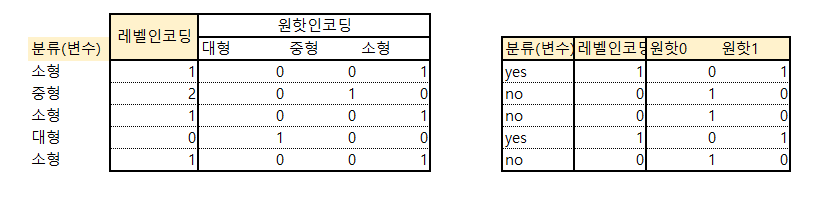

- 인공지능에서는 y값도 이항또는 다항분륜를 소프트 맥스 함수 적용할때는 반드시 원핫인코딩을 해야함.


- 희소행렬(sparse matrix)은 행렬에서 0값의 갯수가 많은 행렬임.
- 특히 텍스트분석할때는 이 희소행렬을 0값이 있는 자료를 제외하고 값이 있는 값만으로 다시 자료를 구성함.

In [105]:
## OneHotEncoder  모듈은 결과값이 array로 되어있다.
import numpy as np
from sklearn.preprocessing import OneHotEncoder
items = ('tv, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서, 믹서').split(',')
items = np.array(items).reshape(-1,1)
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_encoder.categories_

[array([' 냉장고', ' 믹서', ' 선풍기', ' 전자레인지', ' 컴퓨터', 'tv'], dtype='<U6')]

In [108]:
oh_labels = oh_encoder.transform(items) # sparse matrix: 0값이 많은 행렬(희소행렬)

- 희소행렬(sparse matrix)은 행렬에서 0값의 갯수가 많은 행렬임.
- 특히 텍스트분석할때는 이 희소행렬을 0값이 있는 자료를 제외하고 값이 있는 값만으로 다시 자료를 구성함.


In [110]:

arrayData=oh_labels.toarray()
arrayData

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [113]:
# 참고 arrayData를 다시 tv, 냉장고, 등의 글자로 바꾸고자함.
classData = ['냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터', 'tv']
maxindex = np.argmax(arrayData, axis=1)    #  행단위로 가장 큰 값 찾기

for x in maxindex:
    print(classData[x])

tv
냉장고
전자레인지
컴퓨터
선풍기
믹서
믹서


## 더미 변수 [문자 -> 숫자 변환] (교재 119)
- 카테고리에 해당하는 문자변수를 낱개의 필드(x값)로 쪼갬
- 문제점 : 카테고리로 나눈 유니크한 갯수가 너무 많으면 x 변수로 다 처리가 안됨
    - 해결방법 : 라쏘 모듈을 사용 (L1 정규화)
    

In [114]:
import pandas as pd
df = pd.DataFrame({'item':[' 냉장고' ' 믹서' ' 선풍기' ' 전자레인지' ' 컴퓨터' 'tv']})
pd.get_dummies(df)

,item_ 냉장고 믹서 선풍기 전자레인지 컴퓨터tv
0,True


### 스케일링
- 표준화 : StandardScaler
- 정규화 : 값의 범위를 0~1사이로 변경 (minmaxScaler)

In [115]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

In [120]:
df = pd.concat([train_df,test_df])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      102 non-null    int64  
 1   년식      102 non-null    int64  
 2   종류      102 non-null    object 
 3   연비      102 non-null    float64
 4   마력      102 non-null    int64  
 5   토크      102 non-null    float64
 6   연료      102 non-null    object 
 7   하이브리드   102 non-null    int64  
 8   배기량     102 non-null    int64  
 9   중량      102 non-null    int64  
 10  변속기     102 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 9.6+ KB


##  머신러닝에는 결측치가 있으면 안된다.


c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\miniconda3\envs\py\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current fo

<Axes: >

c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\miniconda3\envs\py\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph

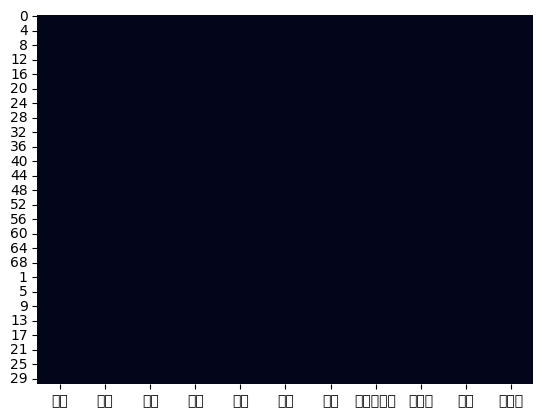

In [125]:
tmp = df.isna().sum()
# plt.bar(tmp.index, tmp)

## 결측치 시각화를 통해서 빠르게 확인가능
## 파이썬 결측치 시각화
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False)

In [128]:
## x, y 변수를 나누고 y값에 영향을 주는 x값을 알기위해서는 EDA를 실행해야함. (6월2일 금요일)
## 현대 자동차 가격을 예측하는 회귀분석
y_data = df['가격'] # 가격에 대한 데이터
# x_data = df.drop(['가격'], axis=1) # 가격에 대한 데이터를 뺀 나머지 데이터
# x_data

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
26,2015,대형,8.9,334,40.3,가솔린,0,3778,1915,자동
27,2015,대형,8.7,175,46.0,디젤,0,2497,2383,수동
28,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
29,2010,소형,13.0,95,12.7,가솔린,0,1399,1046,자동


In [150]:
### x데이터의 문자형식이 어떤 자료가 있는지 확인
df.dtypes

# object 타입의 데이터는 getdummies를 시켜줘야한다.
# 문자자료의 원핫인코딩화
xdummy = pd.get_dummies(df)
xdummy = xdummy.drop(['가격'], axis=1) # 가격에 대한 데이터를 뺀 나머지 데이터

In [151]:
# 훈련과 테스트데이터로 분리
# 훈련자료를 70%로 지정하고, 항상 같은 자료로 나눌수 있도록 설정
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdummy, 
                                                    y_data, 
                                                    test_size=0.3, 
                                                    random_state=777, 
                                                    # stratify = y_data
                                                    )

# 권장사항 (스케일링)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train) # x_train의 min과 max값을 추출하는 과정
scaler.data_min_, scaler.data_max_   # 확인용
# [0] 가장 큰 값은  2010년 [0] 가장 작은 값은 2015년+1000...

x_train = scaler.transform(x_train) # 스케일링을 진행, 두번 실행하면 안됨
x_test = scaler.transform(x_test) # 스케일링을 진행